# <span style='font-family:times new roman'>**Using the radial velocity method to find the semi\-major axis and mass of planets.**</span>

### _Introduction:_

The first ever exo\-planet to be discovered was on the 9th of January 1992 by Aleksander Wolszczan and Dale Frail. \[1\] They had discovered not 1 but 2 rocky planets orbiting a pulsar in the constellation of Virgo \[1\].  Since then, there has been an exponential growth of exoplanets discovered with the number reaching 5000 in 2022! \[1\] This area is increasingly important to study and research for a variety of reasons. It allows physicists to understand better where we came from and if the process that our solar system has gone through is universal. \[2\] Also, it might be the key to understanding one of the biggest questions, in recent years, are there other intelligent life forms? \[2\] This report has data for 3 stars. On the mass of the stars, the radial velocities of the stars in meters per second, the time in days, and the uncertainties of the radial velocity also in meters per second. The aim of this report is to plot the data and a fit of the data, to then use this to determine the mass of the orbiting planet $M_psinI$ as well as the semi\-major axis \(a\) of the planet's orbit. This will be achieved by solving Kepler's equation via a series of root\-finding methods to then be able to compute values for the radial velocity for a fit line of the data with parameters established through trial and error. The radial velocity accuracy of the best\-fit parameters will be assessed by the $\chi^2$ method by seeing how changes in the parameters affect the fit line. Once the established accuracy is obtained the parameters in turn will be used to compute a and Mpsin\(I\).

### _Method:_

Starting with Kepler's Equation. It relates the eccentric anomaly \(E\) and eccentricity \(e\) to the mean anomaly \(M\) by: \[3\]\begin{equation}E - e \sin E = M \end{equation} Where M is given by: \[3\]\begin{equation}
M=\frac{2\pi(t-T_p)}{P}
 \end{equation}In this case, t is the time,Tp is the time at closest approach to the focus and P is the time period. Using equation\(1\) to solve for E then allows us to find the true anomaly \(f\) which can be used to find the position along the orbit as a function of time. \[3\]

Therefore, to solve for E a root\-finding method must be written. For this report, the Newton\-Raphson method will be used. Essentially the method uses an initial estimate of the root and uses the tangent of the function at this root to systematically get closer to the actual root. Mathematically, it is given by:\begin{equation}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
\end{equation} Thus, applying the Newton\-Raphson equation to equations \(1\) & \(2\), the following functions are constructed to find the root.



In [1]:
import numpy as np
def mean_anomaly (t,tp,P):
    '''a function that computes the mean anomaly given time, time at the closest approch to the focus and time period'''
    return (2*np.pi*(t-tp))/P

def kepler(M, e, E):
    '''a function that takes the mean anomaly and eccentricity,Eccentric anomaly as input, aslo know as the kepler equation'''
    return E - e*np.sin(E) - M

Then a function for the derivative of Kepler must be written:



In [2]:
def kepler_derivative (M, e, E):
    '''derivative of keplers equation given the mean anomlay, eccentricty and eccentric anomaly'''
    return 1 - e*np.cos(E)

Next, using the functions above a single step for the root-finding can be computed:



In [3]:
def newton_step(M,e,E):
    """Perform one step of the Newton-Raphson algorithm given the mean anomaly, eccentricty and eccentric anomaly."""
    return E - (kepler(M, e, E)/kepler_derivative(M, e, E))

Finally using the newton\_step function we can find the eccentric anomaly by multiple steps of this function:



In [4]:
Nitermax = 35     # maximum number of iterations
epsilon = 1.0e-8  # convergence parameter - the accuracy of the root

def eccentric_anomaly(e,M):
    """Performs multiple steps of the Newton-Raphson algorithm to find the root of E given eccentircty and the mean anomaly."""
    E_prev = M                                                                                 #inital bounds to find the root (inital estimate of the root)
    E_cur = newton_step(kepler(M, e, E), kepler_derivative(M, e, E),E_prev)
    itterations = 1
    while abs(E_prev - E_cur) > epsilon or itterations < Nitermax:                             # the condtions that the while loop has to meet when finding the root
        E_prev,E_cur = E_cur,newton_step(M,e,E_cur)                                            # new bounds created after callling the functions, this is doing multiple steps of the newton_step function
        itterations += 1                                                                       # when the iterations reach 35 the root finding will stop as definded by Nitermax
    return E_cur

The eccentric anomaly is related to the true anomaly as mentioned before this is shown from the following equations: \[3\]\begin{equation}
\cos f = \frac{\cos E -e}{1-e \cos E} \\\tag{4}
\end{equation}
\begin{equation}
\sin f = \frac{\sqrt{1-e^2} \sin E}{1-e \cos E}\tag{5}
\end{equation}
Therefore, giving that the true anomaly is equal to \[3\]$$f = \tan^{-1} \left(\frac{\sin f}{\cos f} \right)\tag{6}$$Now, to check all this works and to be able to plot the equation \(6\) against time. It will be necessary to create some loops. Lets state that t = 0.1\*n where n = 1,2,3,...,200



In [5]:
e = 0.8   #constant which are defined below to plot fig 1 and 2
Tp = 0
P = 20
E = 2
a = 1

t_list = []
for i in range (0,200):                                    #finding all the values of time and putting them in a list. This list will contain 200 numbers
    t_list.append(0.1*i)

Using this newly made list we can write more for loops to use each number in the time list to calculate a unique value for E, M, and f. Appending these values to their own lists will then allow us to plot a graph.



In [6]:
M_list = []                                                #Empty lists that will be appended. They all are depended on one another and will contain 200 terms as defined in the question by t
E_list = []                                                #This can be checked by doing len(list) of all the list.
f_list = []

for t in t_list:                                           #using the calculated values of time to find each value of the Mean Anomaly (M) and putting those in a list
    M = (2*np.pi * (t - Tp)) / P
    M_list.append(M)
for M in M_list:                                           #using the values of M to calculate the Eccentric Anomaly (E) and putting those in a list
    E = eccentric_anomaly(e,M)
    E_list.append(E)
for E in E_list:                                           #using the values of E to calculate the ture anomaly (f) and putting those in a list
    cos_f = (np.cos(E)-e) / (1 - e*np.cos(E))
    sin_f = (np.sqrt(1-e**2)*np.sin(E)) / (1 - e*np.cos(E))
    inv_tan = np.arctan2(sin_f,cos_f)
    f_list.append(inv_tan)


For example using e = 0.8, Tp = 0 , P = 20 and E = 2 as defined above. The true anomaly can be plotted as a function of time using t\_list and f\_list:


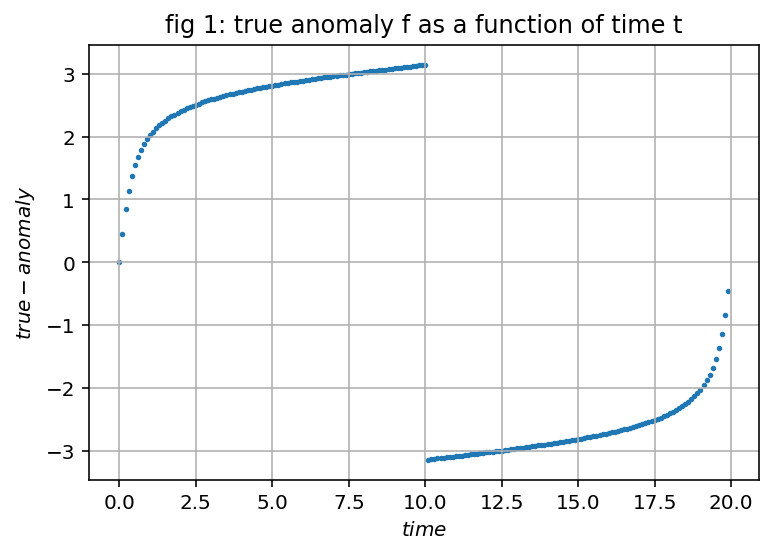

In [7]:
# the true anomaly f as a function of time t.
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(t_list, f_list, s=3)
plt.title("fig 1: true anomaly f as a function of time t")
plt.xlabel("$time$")
plt.ylabel("$true-anomaly$")
plt.grid()

Using f_list from above and the following equations, we can calculate x and y values to plot the orbit of an object on a graph. [3]

$$
r = \frac{a(1-e^2)}{1+e\cos f}\tag{7}
$$

where r is the radial distance, a is the semi\-major axis,  e is the eccentricity and f is the true anomaly. Then x and y can be defined as: \[3\]$$x = r\cos f \\\tag{8}$$
$$y = r\sin f \\\tag{9}$$Now, using the f\_list in another loop to access all the calculated values and use them to find the values in equations \(8\) & \(9\).


In [8]:
x_list = []
y_list = []

for f in f_list:                                           #using the values of f to calulate x and y and putting them in their own lists
    r = (a*(1-(e**2))) / (1 + e*np.cos(f))
    x = r * np.cos(f)
    y = r * np.sin(f)
    x_list.append(x)
    y_list.append(y)

Using the given values above for e, Tp, P, E, and a = 1. The orbit for this object can be plotted:



<ipython-input-9-f6f54e0d12eb>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


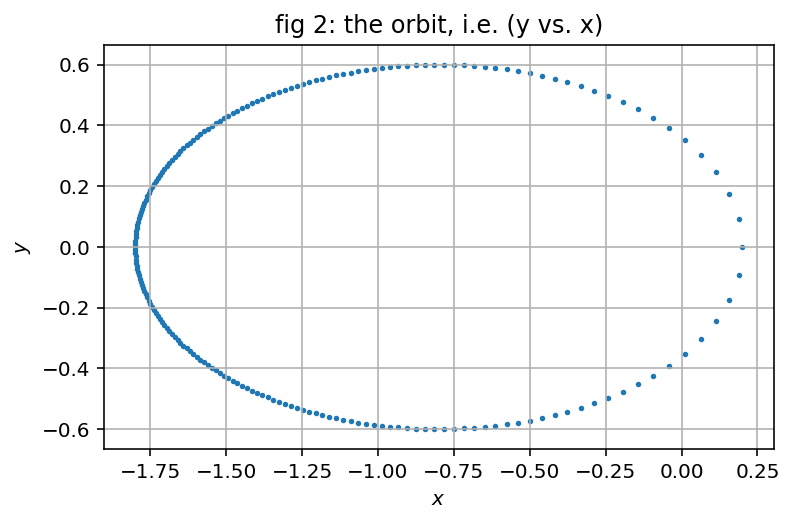

In [9]:
#Plot the orbit, i.e. (y vs. x) and confirm the elliptical shape.
plt.scatter(x_list, y_list, s=3)
plt.title("fig 2: the orbit, i.e. (y vs. x)")
plt.axes().set_aspect('equal')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()


All of this was done to prove that the functions above were working and as seen in fig 2 we get an ellipse that as an eccentricity of 0.8 with semi\-major axis of 1. 



Using the functions that were found above we can compute the radial velocity. The equation for radial velocity is as follows: \[3\]

$$
v_r = v_o + K \cos(f+\omega) + e \cos(\omega)\tag{10}
$$

where  $v_o$  is the average drift speed of the star relative to Earth in meters per second, f is the true anomaly, $K$ is the velocity semi\-amplitude of the orbital motion in meters per second,  e is the eccentricity, and  $\omega$ is an angle identifying the orientation of the orbital motion. \[3\] As we have shown in the functions and calculations above f is dependent on t, Tp, and e. Thus, a function with arguments t, $v_o$ , Tp, K, P, e will have to be written for radial velocity:



In [10]:
def radial_velocity (times,v0,Tp,K,P,e,w):
    '''function that computes the radial velocity for a time (t) '''
    f = np.zeros_like(times)                                        #an array of 0s with the same shape and size of whatever the argument times is 
    for i,t in enumerate(times):                                    #finding the true anomaly (f) by first calling the mean anomaly function (M)
        M = mean_anomaly(t,Tp,P)
        E = eccentric_anomaly(e,M)                                  #then calling the eccentric anomaly fimcton (E). With arguments e given in the function and M calculated above
        cos_f = (np.cos(E)-e) / (1 - e*np.cos(E))                   #now with E it is possible to calculate f
        sin_f = (np.sqrt(1-e**2)*np.sin(E)) / (1 - e*np.cos(E))
        f[i] = np.arctan2(sin_f,cos_f)                              #an arry of all the true anomaly values calculated with the different time value 
    return v0 + (K*np.cos(f+w)) + (e*np.cos(w))                     #returning the radial velocites

For the 3 stars in our data set, it would then be necessary to plot the data itself as well as the fit on the same graph. This is shown in the results sections. To be able to understand how accurate the fit is the $\chi^2$ method will be used. $\chi^2$ is the sum of the squared residuals divided by the number of degrees of freedom or mathematically it is given by:

$$
\chi^2 = \frac{1}{N}\sum_{i=1}^N \left( \frac{y_\text{fitted}(x_i) - y_i)}{\sigma_i} \right)^2\tag{11}
$$

This report will be satisfied with a value of $\chi^2\sim100$ or less. From this equation, another function arises with the arguments $y_{fitted}$, y and $\sigma$. In this report's case $y_{fitted}$ will be the radial velocity fit numbers whilst y will be the actual data of the radial velocity. $\sigma$ will be the uncertainty.


In [11]:
def chi_squared (y_fitted, y, sigma):
    '''the sum of the squared residuals divided by the number of degrees of freedom'''
    i = 0                                                   # since our arguments are all list and you can not subtract two lists we will have to create a while loop to cycle through the terms of the lists
    f = len(y_fitted)                                       # starting with the inital term 0 (defined by i=0) and the final term which is the lenght of the lists (defined by f=len(list))
    values = []
    while i != f:
        v = (y_fitted[i] - y[i])/(sigma[i])                 # while the inital and final term are not equal the inital terms of each the fitted and data list will be taken away from each other and divided by the error
        values.append(v**2)                                 # they will then be squared and added to a list
        i += 1                                              # and the inital value will be increased by 1
    return (1/len(y_fitted)) * sum(values)                  # finally the function will return 1/N (1/len(list)) times the sum of the list created 

This report will look for an accuracy of $\chi^2\sim100$ or less for the data sets provided. Thus the parameter values will need to be adjusted to meet this condition. 

Finally to find the semi\-major orbit of a detected planet the equation below can be used. \[3\]

$$
G(M_*+M_p) = a^3 \left( \frac{2\pi}{P} \right)^2\tag{12}
$$

where $G$ is the gravitational constant, P is the period and since $M_p << M_*$ ,$M_p$ can be disregarded. When equation \(12\) is rearanged for a:


$$
a = \sqrt[3]{\left( \frac{GM_*P^2}{4\pi^2} \right)}\tag{13}
$$

Using this equation, a python function can be written which finds the semi\_major axis given the period and mass of the star.



In [12]:
day2s = 24.*60.*60.                        # seconds in a day
Msun = 1.989E30                            # mass of the sun in kg
AU2m = 1.495978707E11                      # m into AU
G = 6.67408e-11                            # gravitaional constant

def semi_major (P_in_days, M_star_in_SolarM):
    '''function which finds the semi major axis of a system given the time period in days and the mass of the star in solar masses'''
    M = M_star_in_SolarM * Msun                # turning the mass in solar masses to mass in kg
    P = P_in_days * day2s                      # turning the period in days to period in seconds
    a = ((G*M*(P**2))/((np.pi**2)*4))**(1/3)   # calculating the semi major axis in m
    return a / AU2m                            # returning the smei major axis in AU



Lastly, the velocity semi\-amplitude K is a function of masses and orbital properties given by:

$$
K = \left(\frac{2\pi G}{P} \right)^{1/3}\frac{M_p \sin I}{(M_*+M_p)^{2/3}}\frac{1}{\sqrt{1-e^2}}\tag{14}
$$

where e is the eccentricity and $I$ is the inclination of the orbital angular momentum relative to the radial vector joining the star and observer. Once again $M_* + M_p = M_*$ since $M_* >> m_P$ Rearranging equation \(14\)  for $M_pSinI$ will give us the mass of the planet at an angle $I$. \[3\]

$$
M_psinI = \frac{K(M_*)^{\frac{2}{3}}\sqrt{1-e^2}}{(\frac{2\pi G}{P})^{\frac{1}{3}}}\tag{15}
$$



Now a function that calculates equation \(15\) with given arguments. 


In [13]:
Mjupiter = 1.89964273E27                   # Jupiter's mass in kg

def MpSinI (K,P_in_days, M_star_in_SolarM, e):
    '''function whihc computes MpSin(I) given the velocity semi-amplitude, the time period in days, the mass of the star in solar masses and eccentricty'''
    M = M_star_in_SolarM * Msun                                                   # converting solar masses to kg
    P = P_in_days * day2s                                                         # converting days into seconds
    MpSin = ((K)/((2*np.pi*G)/(P))**(1/3)) * ((M)**(2/3)) * np.sqrt(1-(e**2))     # calculating Mpsin(I)
    return  MpSin / Mjupiter                                                      # returning an answer in terms of jupiter masses

### _Results:_

For star 1 in our data, we can unpack the file to give us an array for each column of data.



In [14]:
time_data,rv_data,rv_err = np.loadtxt("star-01.dat", unpack=True)   #creating an array for each column in the data file
print("How many data points:", len(time_data))                      # this number will be useful to define our time list

How many data points: 119


Using the number of data points, in this case 119. Values of time can be found.  By trial and error, it was found that, to have a value of $\chi^2\sim100$ or less for star 1. The parameters must be:

| v01 | Tp1 | K1 | P1 | e1 | w1 |
| :-- | :---- | :-- | :-- | :--- | :---- |
| 40 | \-178 | 290 | 500 | 0.64 | \-250 |



_**Table1: A table showing the parameters for star 1 to be able to get a chi\-squared value less than 100.**_


These values were found by calling the functions that were defined in the method section and creating a set of new lists as shown below. To show the $\chi^2$ value for star 1. The $\chi^2$ function is called and given the correct arguments as shown below.



In [15]:
v01 = 40
Tp1 = -178
K1 = 290
P1 = 500                                          #Guesses fro all the values
e1 = 0.64
w1 = -250
t_fit = np.linspace(0,P1,119)                     #My t value has to go from 0 to P and have 119 data points. 119 since that is the amount of data points in the file star-01.dat

rv_fit = radial_velocity (t_fit,v01,Tp1,K1,P1,e1,w1)                  #Calling the function in the method section to create a radial velocity fit line using my time fit parameter
y_fit = radial_velocity (time_data,v01,Tp1,K1,P1,e1,w1)               #This plots the function with my parameters and the time data provided by the file

print("The chi^2 value was found to be:","{:.2f}".format(chi_squared(y_fit,rv_data,rv_err)))

The chi^2 value was found to be: 90.20


Then plotting these new values.



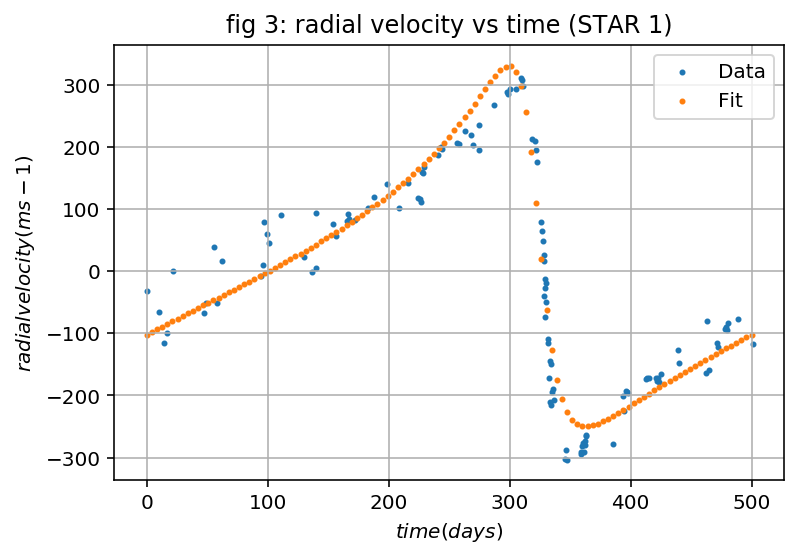

In [16]:
plt.scatter(time_data,rv_data, s=4, label="Data")
plt.scatter(t_fit, rv_fit, s=4, label="Fit")
plt.title("fig 3: radial velocity vs time (STAR 1)")
plt.xlabel("$time (days)$")
plt.ylabel("$radial velocity (ms-1)$")
plt.grid()
plt.legend()

Repeating this exact same process for the other 2 stars, with the correct data set.



In [17]:
time_data2,rv_data2,rv_err2 = np.loadtxt("star-02.dat", unpack=True)   #creating an array for each column in the data file
print("How many data points:", len(time_data2))                         # this number will be useful to define our time list

How many data points: 98


The number of data points are now 98 and thus the time fit parameters will change accordingly.  Once again through trial and error, the following parameters were found to obtain a value of $\chi^2\sim100$ or less for star 2.



In [18]:
v02= -15.5
Tp2 = -200.5
K2= 312.5
P2 = 120
e2 = 0.4
K2= 312.5
w2 = 25
t_fit2 = np.linspace(0,P2,98)

rv_fit2 = radial_velocity (t_fit2,v02,Tp2,K2,P2,e2,w2)
y_fit2 = radial_velocity (time_data2,v02,Tp2,K2,P2,e2,w2)

print("The chi^2 value was found to be:","{:.2f}".format(chi_squared(y_fit2,rv_data2,rv_err2)))

The chi^2 value was found to be: 86.48


| v02 | Tp2 | K2 | P2 | e2 | w2 |
| :----- | :------ | :---- | :-- | :-- | :-- |
| \-15.5 | \-200.5 | 312.5 | 120 | 0.4 | 25 |

_**Table2: A table showing the parameters for star 2 to be able to get a chi\-squared value less than 100.**_

Now plotting these parameters by using the called radial velocities functions as shown in the code cell above, fig 4 is obtained.



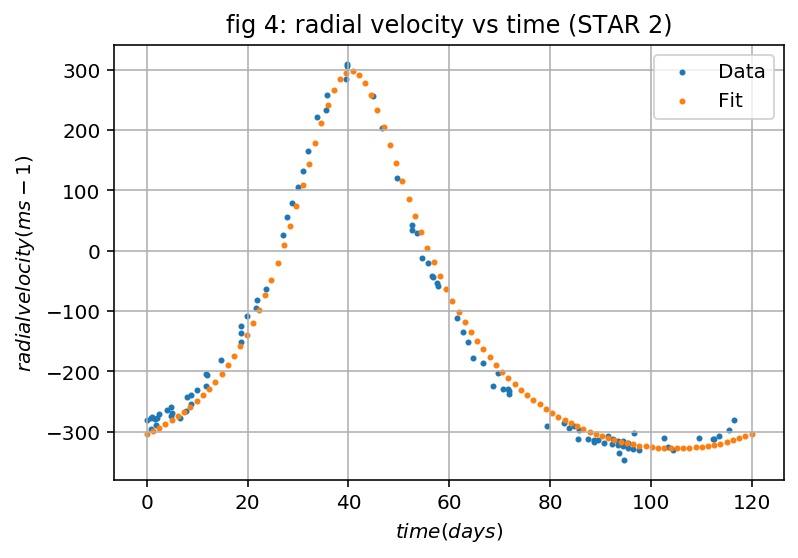

In [19]:
plt.scatter(time_data2,rv_data2, s=4, label="Data")
plt.scatter(t_fit2, rv_fit2, s=4, label="Fit")
plt.title("fig 4: radial velocity vs time (STAR 2)")
plt.xlabel("$time (days)$")
plt.ylabel("$radial velocity (ms-1)$")
plt.grid()
plt.legend()

Lastly for star 3, once again repeating the same method.



In [20]:
time_data3,rv_data3,rv_err3 = np.loadtxt("star-03.dat", unpack=True)   #creating an array for each column in the data file
print("How many data points:", len(time_data3))                      # this number will be useful to define our time list

How many data points: 121


In [21]:
v03 = 0
Tp3 = -90
K3 = 100
P3 = 7
e3 = 0.08
w3 = -90.1
t_fit3 = np.linspace(0,P3,121)

rv_fit3 = radial_velocity (t_fit3,v03,Tp3,K3,P3,e3,w3)
y_fit3 = radial_velocity (time_data3,v03,Tp3,K3,P3,e3,w3)

print("The chi^2 value was found to be:","{:.2f}".format(chi_squared(y_fit3,rv_data3,rv_err3)))

The chi^2 value was found to be: 95.61


| v03 | Tp3 | K3 | P3 | e3 | w3 |
| :-- | :--- | :-- | :-- | :--- | :----- |
| 0 | \-90 | 100 | 7 | 0.08 | \-90.1 |

_**Table3: A table showing the parameters for star 3 to be able to get a chi\-squared value less than 100.**_



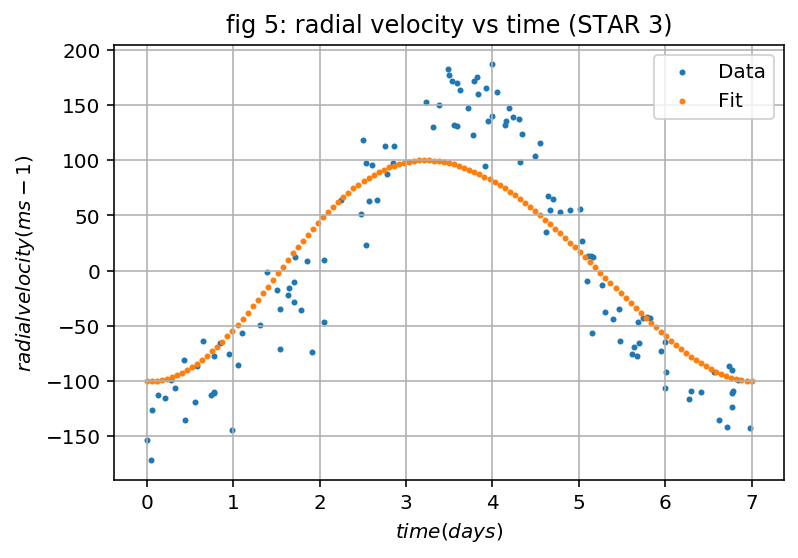

In [22]:
plt.scatter(time_data3,rv_data3, s=4, label="Data")
plt.scatter(t_fit3, rv_fit3, s=4, label="Fit")
plt.title("fig 5: radial velocity vs time (STAR 3)")
plt.xlabel("$time (days)$")
plt.ylabel("$radial velocity (ms-1)$")
plt.grid()
plt.legend()

The final steps are to now use the parameters defined above to solve for the mass and the semi\-major axis of the planet. The mass of the stars are given in solar masses to be: M1=1.82, M2=1.12, M3=0.98. This is done by calling for the semi\_major and MpsinI functions.


In [23]:
M1 = 1.82               # the mass of the 3 stars in solar masses that are given
M2 = 1.12
M3 = 0.98

print("Semi major axis of STAR 1 (AU):","{:.2f}".format(semi_major(P1,M1)))   #calling the smi_major function and printing a result with 2 decimal places, with arguments P1 (period of star 1) and M1 (mass of star 1)
print("Semi major axis of STAR 2 (AU):","{:.2f}".format(semi_major(P2,M2)))   #repeating the line above with the parameters adjusted to calculate for the correct star
print("Semi major axis of STAR 3 (AU):","{:.2f}".format(semi_major(P3,M3)))

Semi major axis of STAR 1 (AU): 1.51
Semi major axis of STAR 2 (AU): 0.49
Semi major axis of STAR 3 (AU): 0.07


In [24]:
print("MpSin(I) of STAR 1:","{:.2f}".format (MpSinI(K1,P1,M1,e1)))      #calling the MpsinI function and printing a result with 2 decimal plcaes, with arguments K1 (K of star 1), P1, M1, and e1 (ecccentricty of star 1)
print("MpSin(I) of STAR 2:","{:.2f}".format (MpSinI(K2,P2,M2,e2)))      #repeating the line above with the parameters adjusted to calculate for the correct star
print("MpSin(I) of STAR 3:","{:.2f}".format (MpSinI(K3,P3,M3,e3)))

MpSin(I) of STAR 1: 12.96
MpSin(I) of STAR 2: 7.49
MpSin(I) of STAR 3: 0.93


| File Name | Stellar Mass $(M_*/M_{\odot})$ | $M \sin I (M_\text{Jupiter})$ | Semi\-major Axis \(AU\) | P \(days\) | $e$ |
| :------------ | :----------------------------- | :---------------------------- | :---------------------- | :--------- | :--- |
| `star-01.dat` | 1.82 | 12.96 | 1.51 | 500 | 0.64 |
| `star-02.dat` | 1.12 | 7.49 | 0.49 | 120 | 0.4 |
| `star-03.dat` | 0.98 | 0.93 | 0.07 | 7 | 0.08 |



_**Table4: A table showing the Stellar Mass of the stars in solar masses, the mass of the planet at an angle I, the semi\-major axis in AU with the period in days and eccentricity.**_


### _Discussion:_



What this report set to find was that if the radial velocity method could find the mass and semi\-major axis of a planet orbiting a star. From the results in table 4 we can see that this was achieved but the mass has one missing variable $I$. This means that the mass value is just an estimate of the minimum mass of the planet. \[4\]  The mass of our stars is left in terms of $sinI$ which gives inaccurate results to the true mass. This is due to that larger values of the inclination lead to smaller radial velocities for a planet with the same mass, as the planet appears to move slower due to the angle it is at \[4\]. The only way the angle can be disregarded is if the angle is when $I=\pi/2$ and the orbit is then edge\-on to the Earth. This is because $sin(\pi/2) = 1$. \[4\] This is one of the major limitations of the radial velocity methods. On the other hand, the semi\-major axis is in the terms that are expected AU. 

Another limitation that was set was the value of $\chi^2\sim100$. The closer $\chi^2$ is to 0 the better the fit and thus the parameters used to calculate the mass and the semi major axis may give a more accurate answer. Using trial and error for star 3 it was found that a value of $\chi^2$ lower then the one established before \(95.61\) calculates a different number for the mass.  As shown below:



In [25]:
v03 = 0             #new values found by trial and error for a better value of chi-squared 
Tp3 = -89.9
K3 = 142
P3 = 7
e3 = 0.02
w3 = -90.1
t_fit3 = np.linspace(0,P3,121)

rv_fit3 = radial_velocity (t_fit3,v03,Tp3,K3,P3,e3,w3)
y_fit3 = radial_velocity (time_data3,v03,Tp3,K3,P3,e3,w3)

print("The chi^2 value was found to be:","{:.2f}".format(chi_squared(y_fit3,rv_data3,rv_err3)))

The chi^2 value was found to be: 40.56


This would then cause the values of $M_pSinI$ and a to change.



In [26]:
print("Semi major axis of STAR 3 (AU) are now:","{:.2f}".format(semi_major(P3,M3)))
print("MpSin(I) of STAR 3 are now:","{:.2f}".format (MpSinI(K3,P3,M3,e3)))

Semi major axis of STAR 3 (AU) are now: 0.07
MpSin(I) of STAR 3 are now: 1.32


| v03 | Tp3 | K3 | P3 | e3 | w3 |
| :-- | :----- | :-- | :-- | :--- | :----- |
| 0 | \-89.9 | 142 | 7 | 0.02 | \-90.1 |

_**Table5: A table showing the new parameters for star 3 to get a chi-sqaured value closer to 0**_



Comparing these values to table 4 it can be seen that the semi\-major axis remained the same as the value of the period and mass did not change and thus did not affect a. Whilst, for  $Msin(I)$ the parameters changed from \-90 to \-89.9 for Tp3, 100 to 142 for K3, 0.08 to 0.02 for e3 whilst the rest stayed the same. This in turn made the mass of the planet go from 0.93 Jupiter masses to 1.32. This shows how reducing the value of $\chi^2$, in this case from 95.61 to 40.56 may give a more accurate estimation of the minimum mass of the planet.


Whilst changing the parameters through trial and error I found that each of them changed the functions in their own way. Knowing what the parameters do may be of use when reproducing this report with different stars and thus different data. Using star 1 It was found that Tp transforms the function by moving it left to right depending on the sign. e suppresses the function. K increases or decreases the maximums and minimums depending on the sign. v0 shifts the whole function up the y\-axis whilst $\omega$  since its an angle and thus periodic this report can not be certain about the way it affects the function.

Once again for star 1, it was found that small changes in the parameter $\omega$ , would result in large changes of $\chi^2$ meaning that the value of $\omega$ is close to the correct value. The other parameters for star 1, when changed by a little, would result in small changes of  $\chi^2$ thus meaning that the values are not as accurate. Star 2 $\omega$ is also close to the correct value as once again $\chi^2$ changes by a lot. Finally, star 3, $\omega$ is also the parameter that does this. Therefore, the only parameter that this report can be sure to be almost accurate is $\omega$ since all the other parameters when they are changed by a little $\chi^2$ does not change by a lot.

Something that could have been done to improve the code and increase the efficiency was to set up a function that would find the parameters when a certain $\chi^2$ value is obtained. This way parameters with $\chi^2$ values less than e.g 10 could be found and could give a better estimate of the mass.


### _Conclusion:_

It was shown in the discussion section that the radial velocity method was able to find the semi\-major in AU and an estimation of the minimum mass of the planet. Whilst a value for the semi\-major axis is achieved in AU. The limitation of this method was that an accurate number for the mass of the planet could not be established without knowing the inclination angle. A way to overcome and to also improve this method would be to use the transit method on the stars. Meaning a value of I can be established. The transit method essentially is observing the planet pass in front of the star. Also, the transit method only works if the system is edge\-on to earth thus finding I to be $\frac{\pi}{2}$. \[5\] The transit method requires constant monitorization of the star and may require more resources and time or a larger acquired data set.

In conclusion the radial velocity method can be used to find the semi\-major axis and only an estimation of the minimum mass of the planet if the orbit is not edge\-on to earth.


### _References:_

\[1\] Historic timeline \(2022\) NASA. NASA. Available at: [https://exoplanets.nasa.gov/alien\-worlds/historic\-timeline/\#first\-exoplanets\-discovered](https://exoplanets.nasa.gov/alien-worlds/historic-timeline/#first-exoplanets-discovered) \(Accessed: November 13, 2022\). 

\[2\] Christiansen, J. \(2020\) Why do scientists search for exoplanets? here are 7 reasons, NASA. NASA. Available at: [https://exoplanets.nasa.gov/news/1610/why\-do\-scientists\-search\-for\-exoplanets\-here\-are\-7\-reasons/\#:~:text=We spent all of our,in our own solar system](https://exoplanets.nasa.gov/news/1610/why-do-scientists-search-for-exoplanets-here-are-7-reasons/#:~:text=We%20spent%20all%20of%20our,in%20our%20own%20solar%20system). \(Accessed: November 13, 2022\). 

\[3\] [Murray, C.D., and Correia, A. \(2010\) Keplerian Orbits and Dynamics of Exoplanets. In Exoplanets, eds.edited by S. Seager. Tucson, AZ: University of Arizona Press, 2010, 526 pp. ISBN 978\-0\-8165\-2945\-2.](https://arxiv.org/pdf/1009.1738.pdf)

\[4\] [Lovis, C., and Fisher, D., \(2010\) Radial Velocity Techniques for Exoplanets, In Exoplanets, eds.edited by S. Seager. Tucson, AZ: University of Arizona Press, 2010, 526 pp. ISBN 978\-0\-8165\-2945\-2., p.27\-53"   ](https://ui.adsabs.harvard.edu/abs/2010exop.book...27L/abstract)

\[5\] Kane, S.R. and Gelino, D.M. \(2011\) “On the inclination dependence of exoplanet phase signatures,” The Astrophysical Journal, 729\(1\), pp. 2–3. Available at: https://doi.org/10.1088/0004\-637x/729/1/74. 

